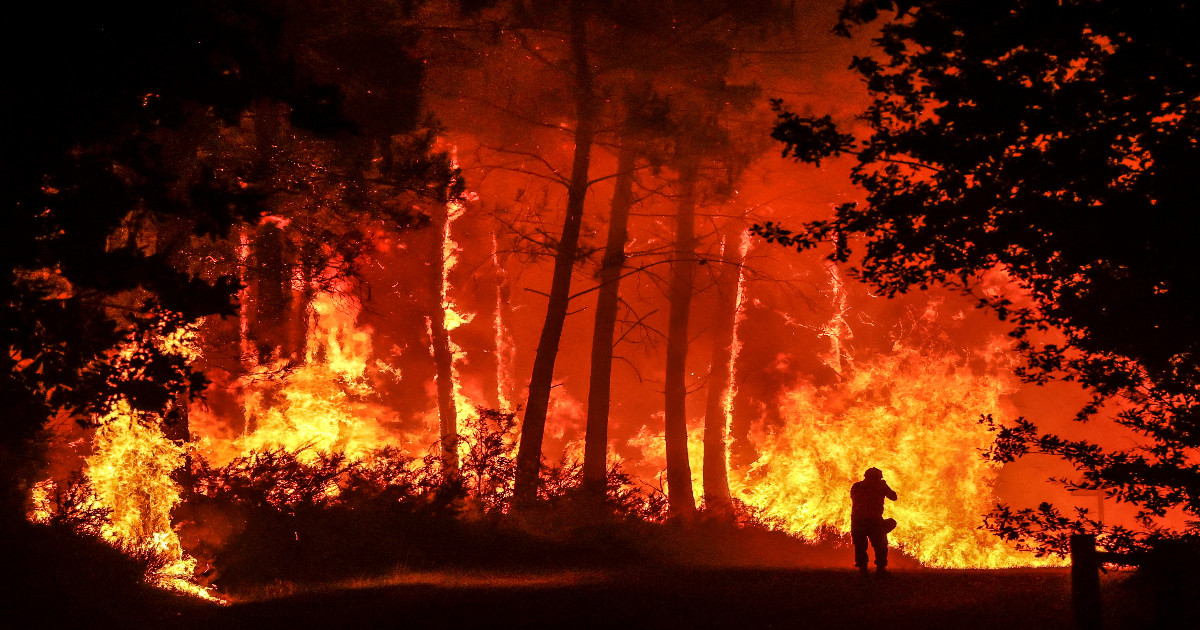

# Problem Statement

* **To predict the temperature using Algerian Forest Fire Dataset**

This data is collected from https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++ 

* Data Set Information:

* The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

* 122 instances for each region.

* The period from June 2012 to September 2012.
* The dataset includes 11 attribues and 1 output attribue (class)
* The 244 instances have been classified into fire (138 classes) and not fire (106 classes) classes.

**Attribute Information**
1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
    
Weather data observations

2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
        
FWI Components

6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Region: two regions, 1 = Bejaia Region and 2 = Sidi-Bel Abbes Region
12. Update_Classes: two classes, namely 0 = not fire and 1 = fire

## 1. Import Data and Required Packages

In [1]:
import scipy.stats as stats 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from six.moves import urllib

warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv', header = 1)
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


## Analyzing Data

In [3]:
### Checking null values
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        1
dtype: int64

In [5]:
## Checking Duplicate values
df.duplicated().sum()

0



Here the Missing values at 122th index seprate the data set in two regions.

1 : Bejaia Region Dataset

2 : Sidi-Bel Abbes Region Dataset

Therefore, we can drop rows with missing values & make a new column based on the Region


In [6]:
df.drop([122,123],axis=0,inplace=True)
df.reset_index(inplace=True)
df.iloc[121:]

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
121,121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
123,125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire
124,126,03,06,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire
125,127,04,06,2012,30,64,14,0,79.4,5.2,15.4,2.2,5.6,1,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire
240,242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
241,243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
242,244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [7]:
## Dropping extra index column
df.drop(['index'],axis=1,inplace=True)

### Creating Region Feature

In [8]:
df.loc[:121,"Region"]=1
df.loc[122:243,"Region"]=2
df[['Region']] = df[['Region']]

In [9]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [10]:
## Removing extra space in column name
df.columns=df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

#### Function for removing extra space from the dataset if any

In [11]:
def Removeextraspace(s):
    return s.replace (" ","")

In [12]:
df['Classes']=df['Classes'].apply(Removeextraspace)

#### Updating Classes feature with fire as 1 & not fire as 0

In [13]:
df['Classes']=df['Classes'].map({'notfire':0,'fire':1})

In [14]:
df.head(5)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,0,1.0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,0,1.0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1.0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,0,1.0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,0,1.0


Shape of the dataset

In [15]:
df.shape

(244, 15)

Check Datatypes in the dataset

In [16]:
df.info()
#Check null & Dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    object 
 1   month        244 non-null    object 
 2   year         244 non-null    object 
 3   Temperature  244 non-null    object 
 4   RH           244 non-null    object 
 5   Ws           244 non-null    object 
 6   Rain         244 non-null    object 
 7   FFMC         244 non-null    object 
 8   DMC          244 non-null    object 
 9   DC           244 non-null    object 
 10  ISI          244 non-null    object 
 11  BUI          244 non-null    object 
 12  FWI          244 non-null    object 
 13  Classes      244 non-null    int64  
 14  Region       244 non-null    float64
dtypes: float64(1), int64(1), object(13)
memory usage: 28.7+ KB


In [17]:
#converting datatype of features for analysis


df[['Temperature','RH','Ws']] = df[['Temperature','RH','Ws']].astype(int)

df[['Rain','FFMC','DMC','DC','ISI','BUI','FWI']] = df[['Rain','FFMC','DMC','DC','ISI','BUI','FWI']].astype(float)

df [['Classes','Region']] = df[['Classes','Region']].astype(object)

In [18]:
#new dTypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    object 
 1   month        244 non-null    object 
 2   year         244 non-null    object 
 3   Temperature  244 non-null    int32  
 4   RH           244 non-null    int32  
 5   Ws           244 non-null    int32  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    object 
 14  Region       244 non-null    object 
dtypes: float64(7), int32(3), object(5)
memory usage: 25.9+ KB


In [19]:
#Check unique values
df.nunique()

day             31
month            4
year             1
Temperature     19
RH              62
Ws              18
Rain            39
FFMC           173
DMC            166
DC             198
ISI            106
BUI            173
FWI            126
Classes          2
Region           2
dtype: int64

In [20]:
#display summary statistics for a dataframe
df.describe(include='all')

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
count,244,244,244,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.0,244.0
unique,31,4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0
top,01,07,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0
freq,8,62,244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,138.0,122.0
mean,NaN,NaN,NaN,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288115,4.759836,16.673361,7.049180,NaN,NaN
std,NaN,NaN,NaN,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619662,4.154628,14.201648,7.428366,NaN,NaN
min,NaN,NaN,NaN,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000,NaN,NaN
50%,NaN,NaN,NaN,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.450000,4.450000,NaN,NaN
75%,NaN,NaN,NaN,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.375000,NaN,NaN


In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,244.0,32.172131,3.633843,22.0,30.000,32.00,35.000,42.0
RH,244.0,61.938525,14.884200,21.0,52.000,63.00,73.250,90.0
Ws,244.0,15.504098,2.810178,6.0,14.000,15.00,17.000,29.0
Rain,244.0,0.760656,1.999406,0.0,0.000,0.00,0.500,16.8
FFMC,244.0,77.887705,14.337571,28.6,72.075,83.50,88.300,96.0
DMC,244.0,14.673361,12.368039,0.7,5.800,11.30,20.750,65.9
DC,244.0,49.288115,47.619662,6.9,13.275,33.10,68.150,220.4
ISI,244.0,4.759836,4.154628,0.0,1.400,3.50,7.300,19.0
BUI,244.0,16.673361,14.201648,1.1,6.000,12.45,22.525,68.0
FWI,244.0,7.049180,7.428366,0.0,0.700,4.45,11.375,31.1


##  Exploring Data
### Segregate Numerical and Categorical Features from the Dataset

In [22]:
#define numerical and catgorical columns
numeric_features = [i for i in df.columns if df[i].dtype != 'O']
categorical_features = [i for i in df.columns if df[i].dtype == 'O']

#print  columns
print ('We have {} numerical features: {}'.format(len(numeric_features),numeric_features))
print ('We have {} categorical features: {}'.format(len(categorical_features),categorical_features))

We have 10 numerical features: ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']
We have 5 categorical features: ['day', 'month', 'year', 'Classes', 'Region']


## Univariate Analysis

    The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.


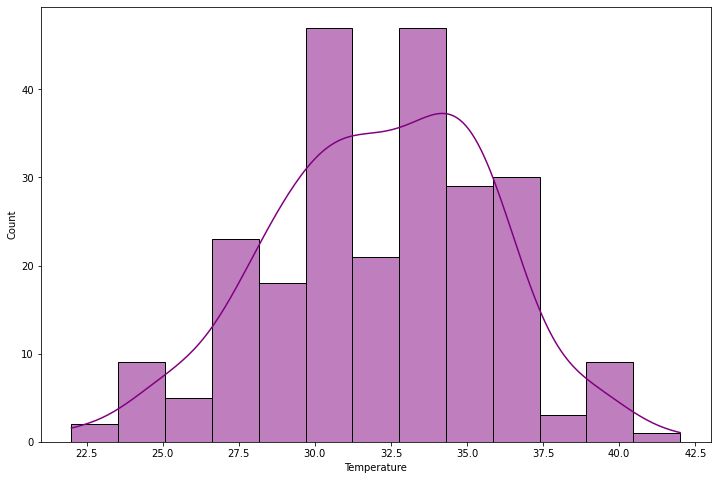

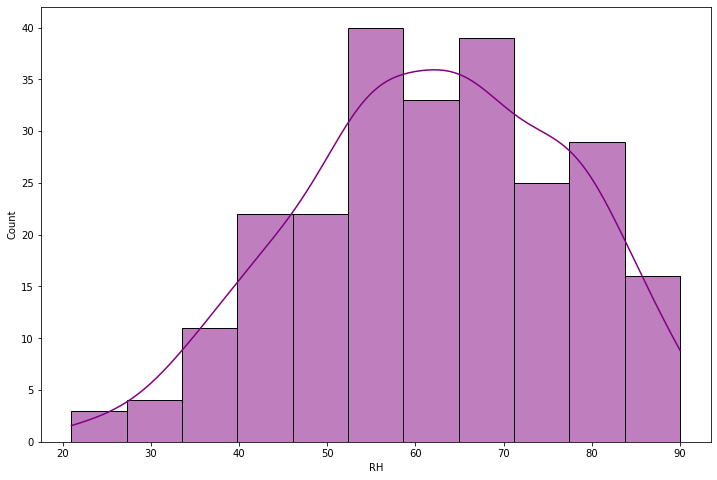

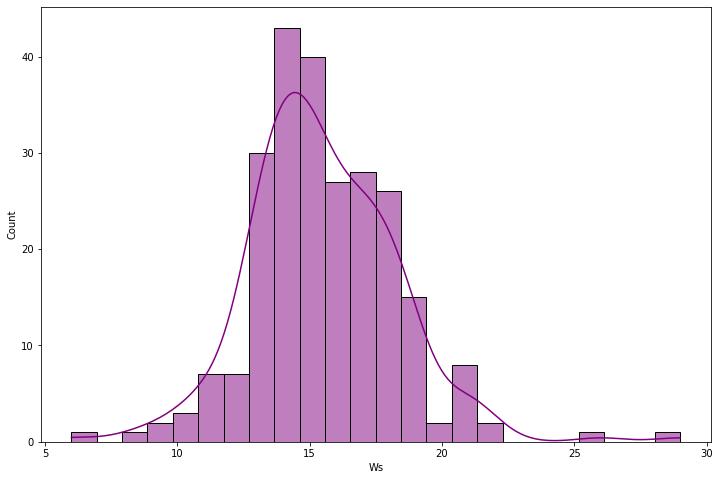

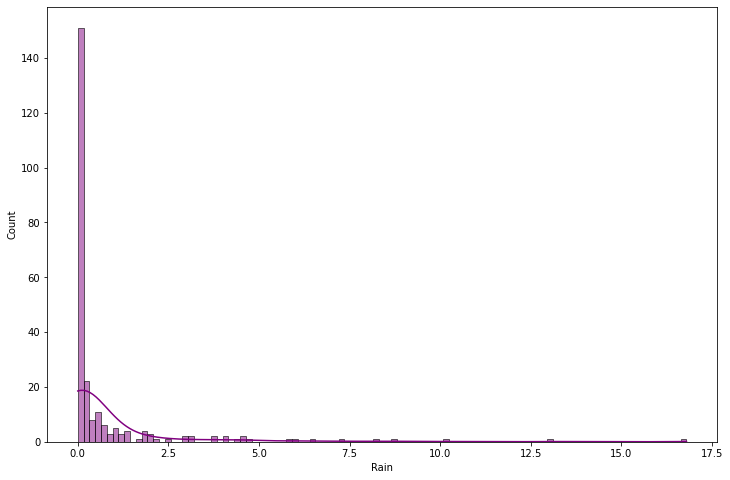

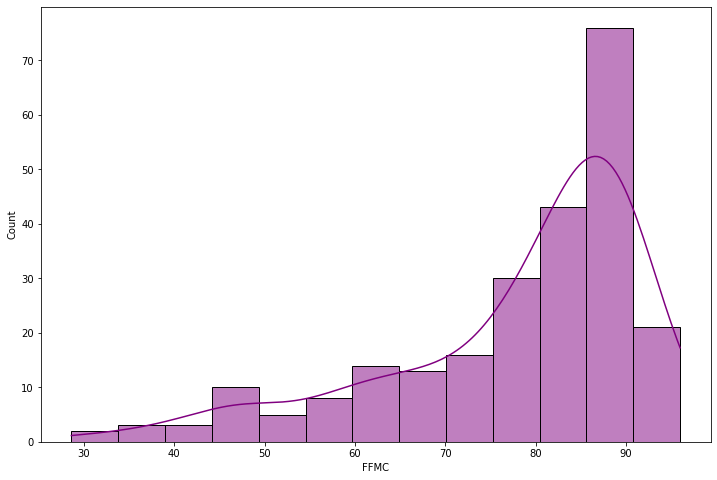

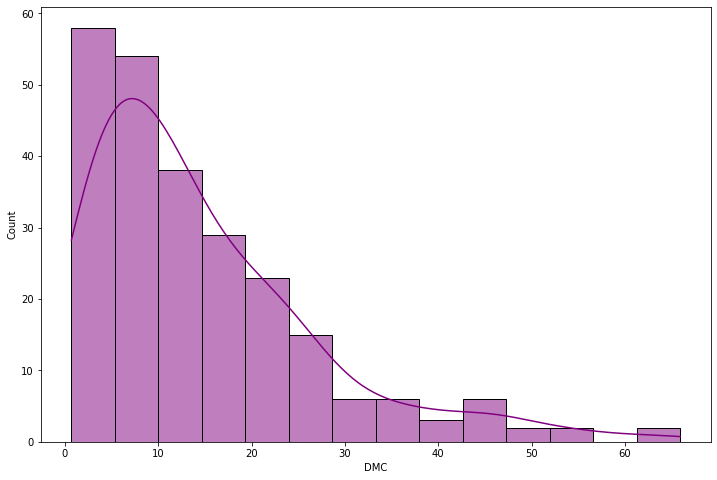

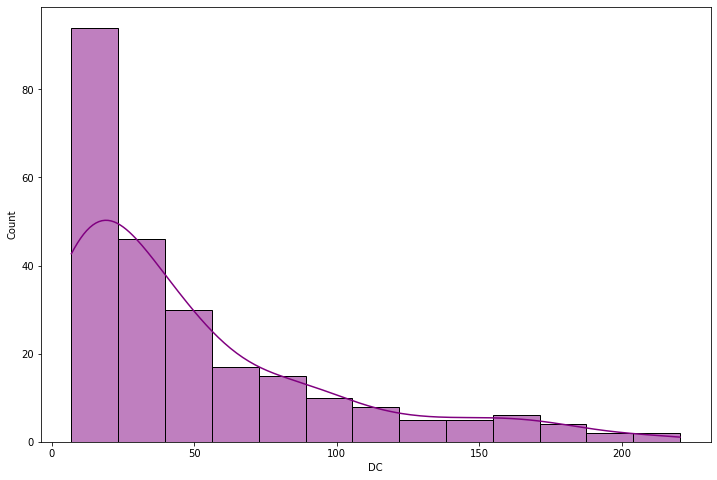

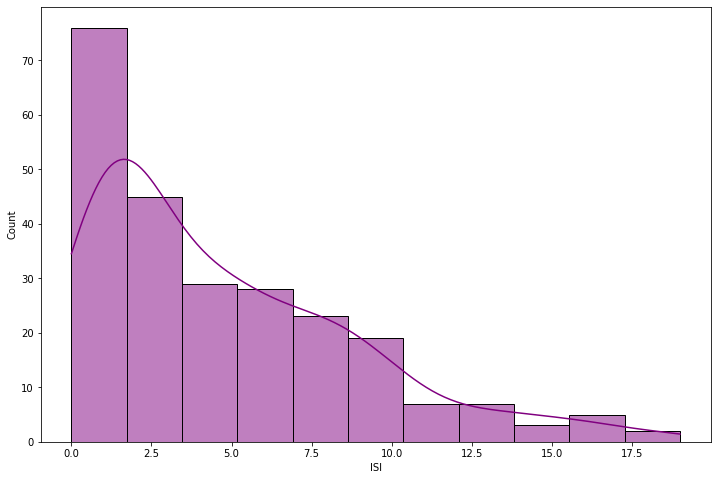

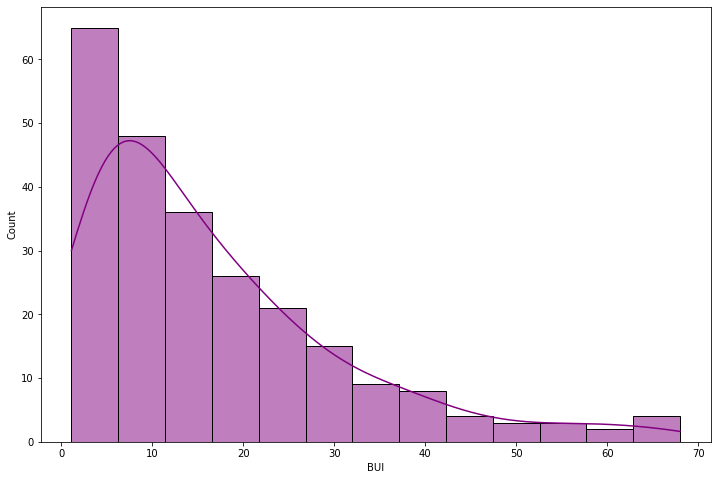

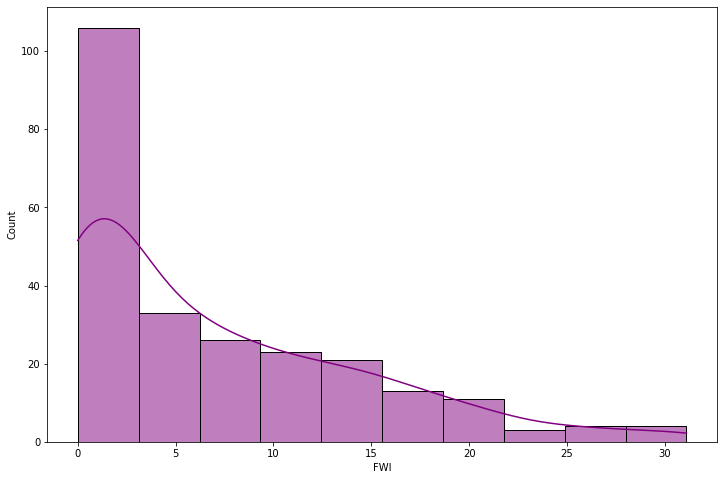

In [23]:
for feature in numeric_features:
    plt.figure(figsize=(12,8))
    sns.histplot(data=df,x=feature,kde=True,bins='auto',color='purple')
    plt.show()

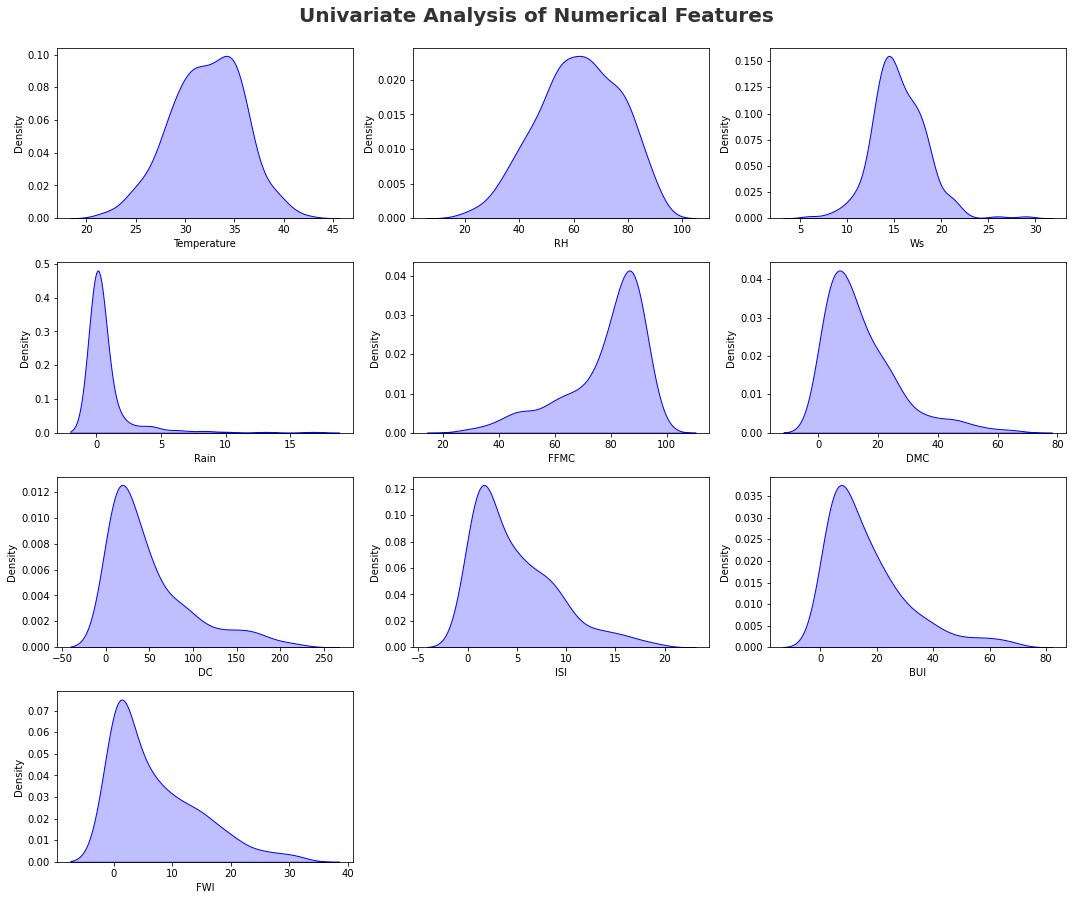

In [24]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]],shade=True, color='b')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

In [25]:
temp = stats.normaltest(df['Temperature'])[1]
rain = stats.normaltest(df['Rain'])[1]
print(temp,rain)


0.41054511225166823 1.2524219484693881e-57


Data is normally distributed as p>0.05

## Outlier Detection

Text(0.5, 1.0, 'Before Removing Outliers')

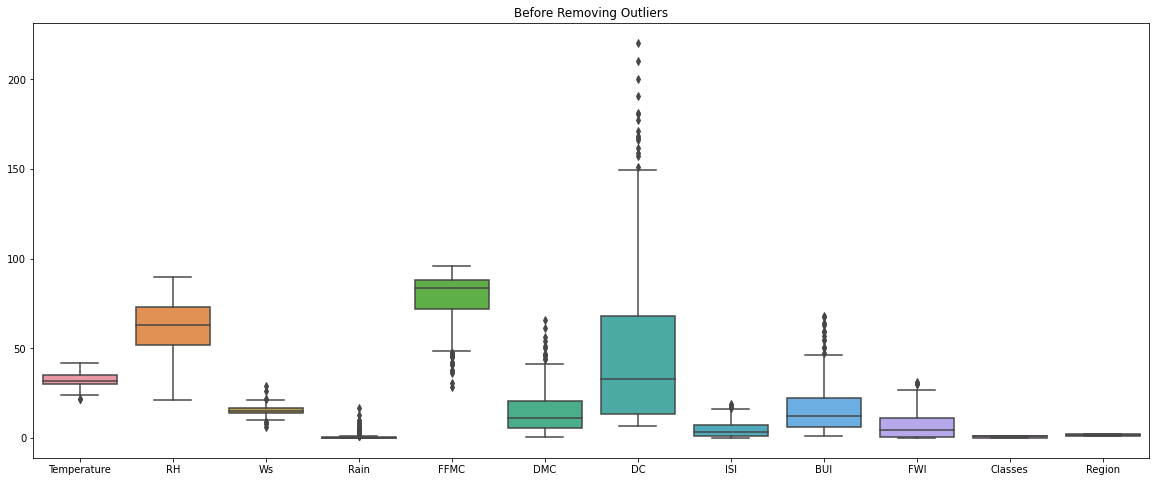

In [26]:
plt.figure(figsize=(20,8))
sns.boxplot(data=df)
plt.title("Before Removing Outliers")

Text(0.5, 1.0, 'Before Removing Outliers')

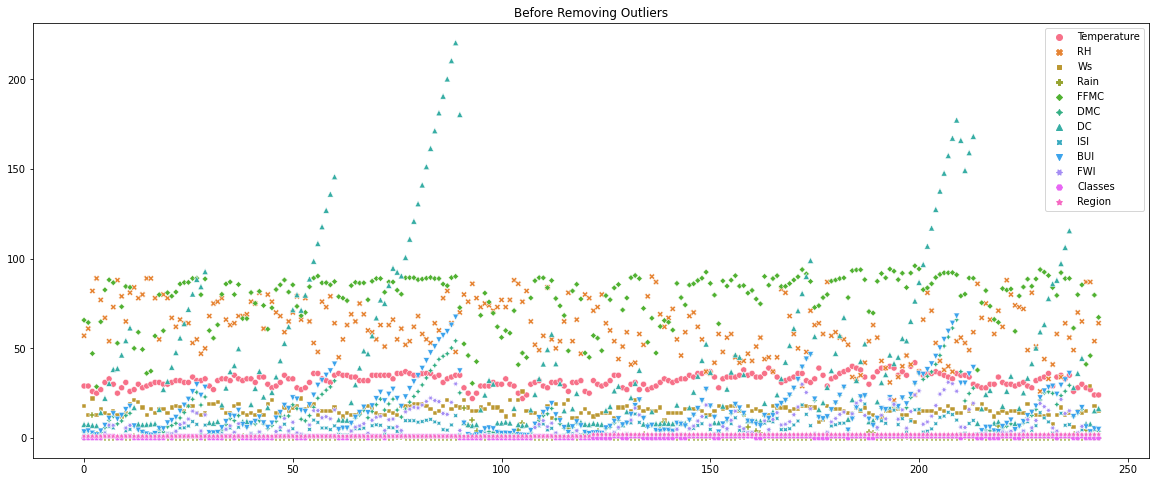

In [27]:
plt.figure(figsize=(20,8))
sns.scatterplot(data=df)
plt.title("Before Removing Outliers")

### Function to find upper and lower boundaries

In [28]:
def boundary (df,variable):
    IQR = df[variable].quantile(0.75)-df[variable].quantile(0.25)
    upper_fence = df[variable].quantile(0.75)+(1.5*IQR)
    lower_fence = df[variable].quantile(0.25)-(1.5*IQR)
    return upper_fence,lower_fence

In [29]:
#Upper and lower boundary of every feature
for x in numeric_features:
    print(x,"-----",boundary(df,x))

Temperature ----- (42.5, 22.5)
RH ----- (105.125, 20.125)
Ws ----- (21.5, 9.5)
Rain ----- (1.25, -0.75)
FFMC ----- (112.63749999999999, 47.73750000000001)
DMC ----- (43.175, -16.624999999999996)
DC ----- (150.46250000000003, -69.03750000000002)
ISI ----- (16.150000000000002, -7.450000000000001)
BUI ----- (47.3125, -18.787499999999998)
FWI ----- (27.387500000000003, -15.312500000000004)


## Statistical Analysis

In [30]:
df.cov()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
Temperature,13.204817,-35.396782,-2.840215,-2.374270,35.297598,21.712423,64.111931,9.148506,23.553987,15.300965
RH,-35.396782,221.539415,9.874739,6.635431,-137.785533,-74.580245,-156.165754,-42.561327,-73.916459,-64.178446
Ws,-2.840215,9.874739,7.897102,0.956129,-6.577727,-0.043306,10.203135,0.142964,1.209369,0.708851
Rain,-2.374270,6.635431,0.956129,3.997623,-15.595918,-7.135415,-28.258988,-2.889611,-8.501670,-4.823366
FFMC,35.297598,-137.785533,-6.577727,-15.595918,205.565939,106.820535,344.044709,44.124525,120.185186,73.640607
DMC,21.712423,-74.580245,-0.043306,-7.135415,106.820535,152.968382,515.552604,34.856991,172.521016,80.407612
DC,64.111931,-156.165754,10.203135,-28.258988,344.044709,515.552604,2267.632245,99.696270,636.831657,260.718118
ISI,9.148506,-42.561327,0.142964,-2.889611,44.124525,34.856991,99.696270,17.260932,37.841354,28.467868
BUI,23.553987,-73.916459,1.209369,-8.501670,120.185186,172.521016,636.831657,37.841354,201.686818,90.399916
FWI,15.300965,-64.178446,0.708851,-4.823366,73.640607,80.407612,260.718118,28.467868,90.399916,55.180617


In [31]:
df.skew()

day            0.002806
month          0.000000
year           0.000000
Temperature   -0.196309
RH            -0.237964
Ws             0.545881
Rain           4.579071
FFMC          -1.325633
DMC            1.527652
DC             1.479042
ISI            1.126950
BUI            1.458466
FWI            1.143243
Classes       -0.266220
Region         0.000000
dtype: float64

## Multivariate Analysis

* Multivariate analysis is the analysis of more than one variable.

In [32]:
df[(list(df.columns)[1:])].corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
Temperature,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370498,0.605971,0.456415,0.566839
RH,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220330,-0.688268,-0.349685,-0.580457
Ws,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076245,0.012245,0.030303,0.033957
Rain,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296804,-0.347862,-0.299409,-0.324755
FFMC,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503910,0.740751,0.590251,0.691430
DMC,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875358,0.678355,0.982206,0.875191
DC,0.370498,-0.220330,0.076245,-0.296804,0.503910,0.875358,1.000000,0.503919,0.941672,0.737041
ISI,0.605971,-0.688268,0.012245,-0.347862,0.740751,0.678355,0.503919,1.000000,0.641351,0.922422
BUI,0.456415,-0.349685,0.030303,-0.299409,0.590251,0.982206,0.941672,0.641351,1.000000,0.856912
FWI,0.566839,-0.580457,0.033957,-0.324755,0.691430,0.875191,0.737041,0.922422,0.856912,1.000000


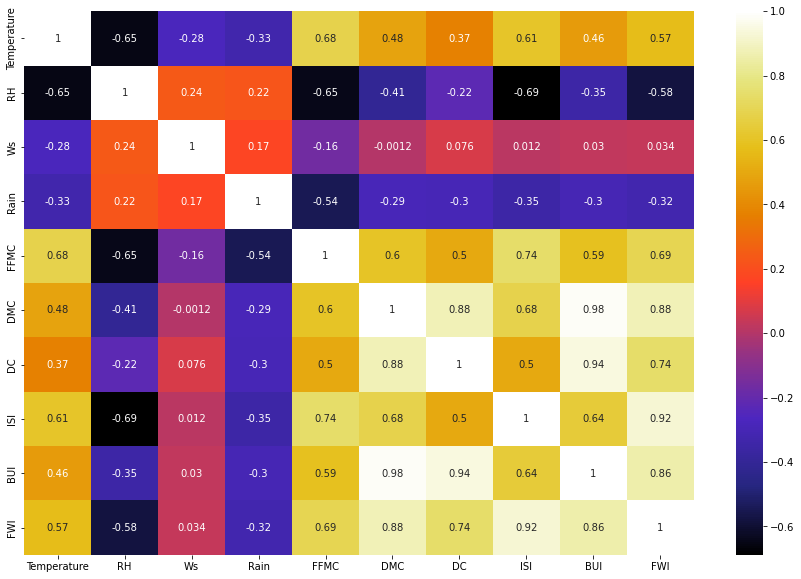

In [33]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), cmap="CMRmap",annot=True)
plt.show()

**Observations**
* DMC & BUI are 98% positively correlated
* DC & BUI are 94% positively correlated
* ISI & FWI are 92% positively correlated


### Visualize the Target Feature

Text(0.5, 1.0, 'Class Distributions \n 0: No Fire || 1: Fire')

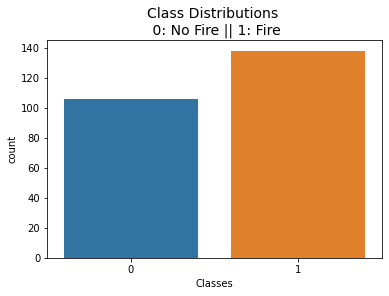

In [34]:
sns.countplot('Classes', data=df, palette="tab10")
plt.title('Class Distributions \n 0: No Fire || 1: Fire', fontsize=14)

### Monthwise Fire Analysis

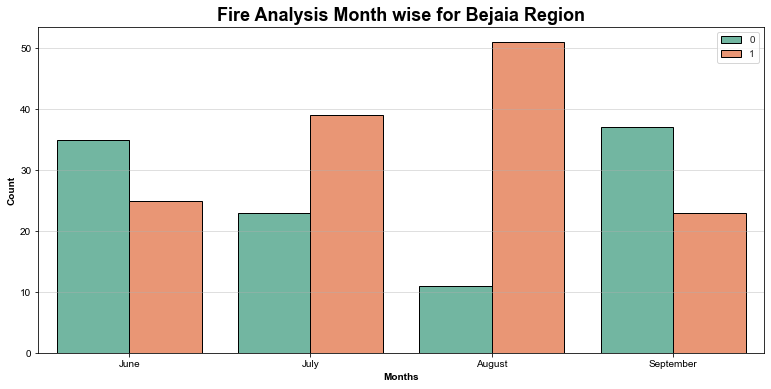

In [35]:
dftemp= df.loc[df['Region']== 1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data= df,ec = 'black', palette= 'Set2')
plt.title('Fire Analysis Month wise for Bejaia Region', fontsize=18, weight='bold')
plt.ylabel('Count', weight = 'bold')
plt.xlabel('Months', weight= 'bold')
plt.legend(loc='upper right')
plt.xticks(np.arange(4), ['June','July', 'August', 'September',])
plt.grid(alpha = 0.5,axis = 'y')
plt.show()

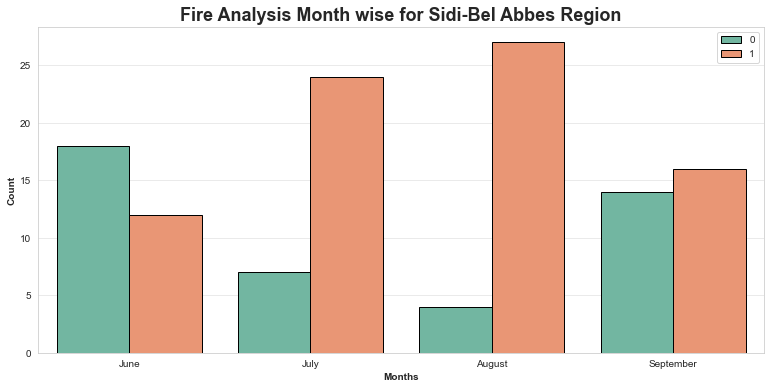

In [36]:
dftemp1= df.loc[df['Region']== 2]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data= dftemp1,ec = 'black', palette= 'Set2')
plt.title('Fire Analysis Month wise for Sidi-Bel Abbes Region', fontsize=18, weight='bold')
plt.ylabel('Count', weight = 'bold')
plt.xlabel('Months', weight= 'bold')
plt.legend(loc='upper right')
plt.xticks(np.arange(4), ['June','July', 'August', 'September',])
plt.grid(alpha = 0.5,axis = 'y')
plt.show()



**Report**
* **Highest number of fire occurances are observed in the month of August for both Bejaia & Sidi-Bel Abbes region**

## Model Building

In [37]:
# Convert day, month, year into one Date feature
df['Date']=pd.to_datetime(df[['day','month','year']])

In [38]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,Date
0,01,06,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1.0,2012-06-01
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1.0,2012-06-02
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1.0,2012-06-03
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1.0,2012-06-04
4,05,06,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1.0,2012-06-05


 ### Regression Plot

In [39]:
consider_feature = [feature for feature in df.columns if feature not in ['Temperature','day','month','year','Date','Classes','Region']]
consider_feature

['RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']

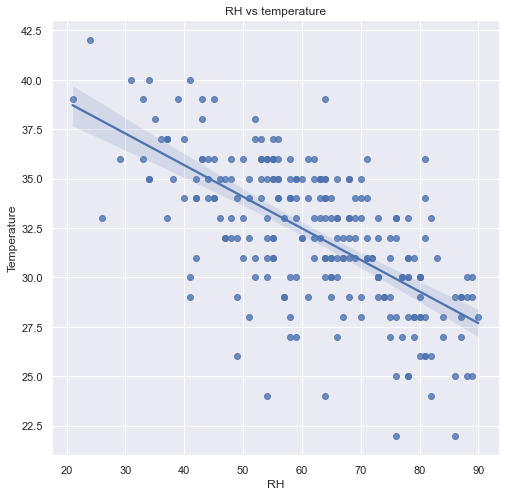

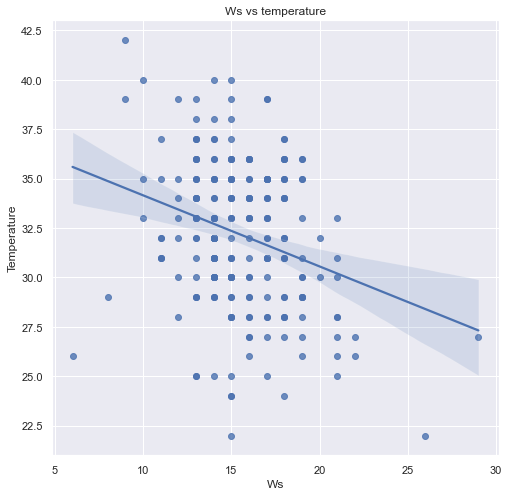

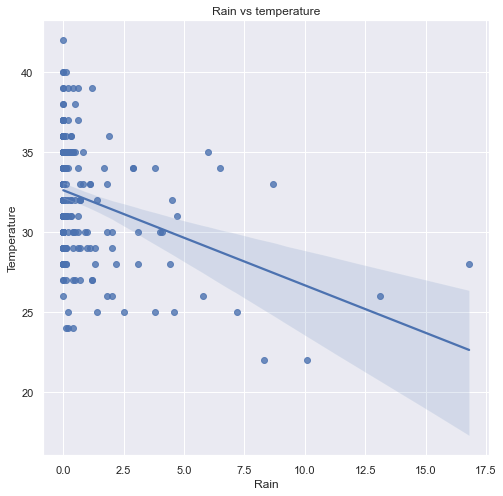

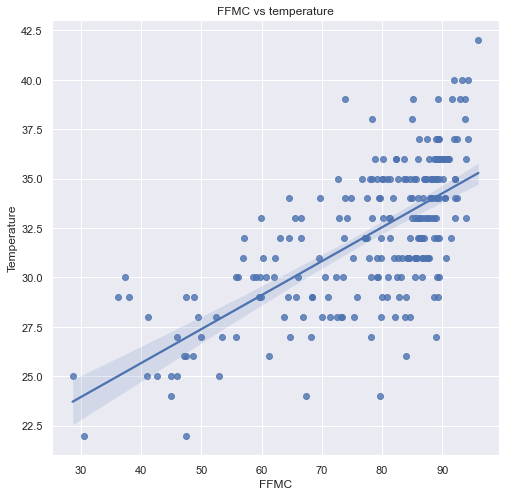

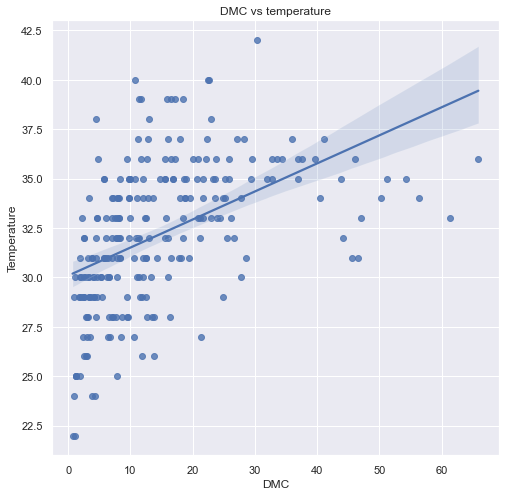

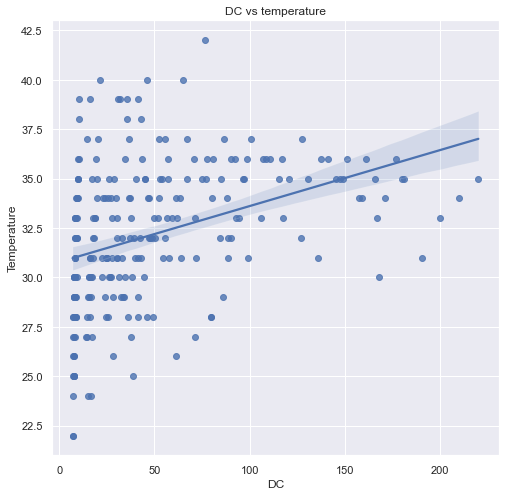

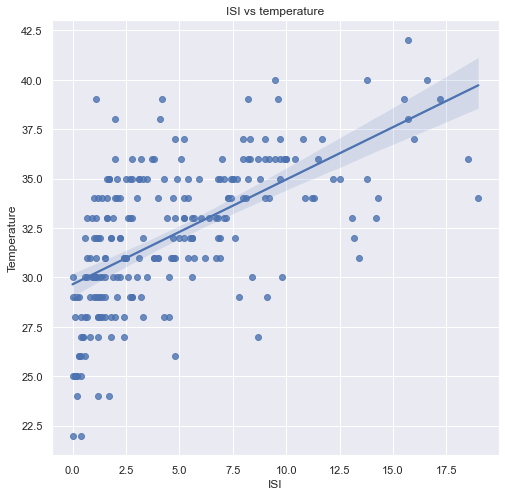

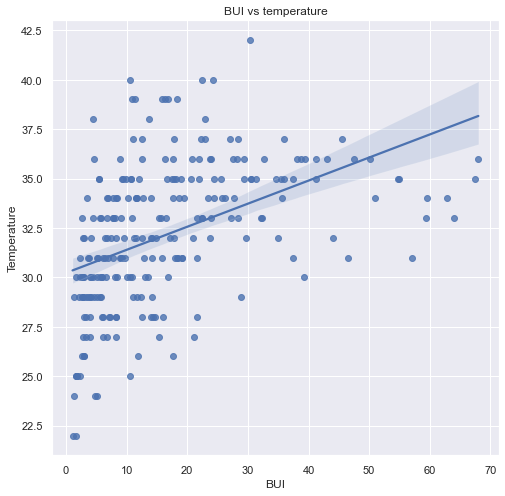

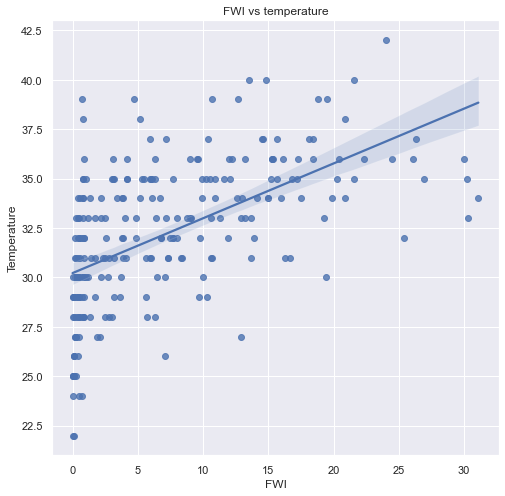

In [40]:
for feature in consider_feature:
    sns.set(rc={'figure.figsize':(8,8)})
    sns.regplot (x=df[feature],y=df['Temperature'])
    plt.xlabel(feature)
    plt.ylabel('Temperature')
    plt.title("{} vs temperature".format(feature))
    plt.show()

### Segreagate Independent and Dependent feature


In [41]:
# x= independent feature y= dependent feature
X = df[['RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']]
y = df[['Temperature']]

In [42]:
X.head()

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5


In [43]:
y.head()

,Temperature
0,29
1,29
2,26
3,25
4,27


### Split the data into training and testing dataset

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [46]:
X_train

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
114,54,11,0.5,73.7,7.9,30.4,1.2,9.6,0.7
65,65,13,0.0,86.8,11.1,29.7,5.2,11.5,6.1
132,42,21,0.0,90.6,18.2,30.5,13.4,18.0,16.7
207,40,18,0.0,92.1,56.3,157.5,14.3,59.5,31.1
162,56,15,2.9,74.8,7.1,9.5,1.6,6.8,0.8
...,...,...,...,...,...,...,...,...,...
106,82,15,0.4,44.9,0.9,7.3,0.2,1.4,0.0
14,80,17,3.1,49.4,3.0,7.4,0.4,3.0,0.1
92,76,17,7.2,46.0,1.3,7.5,0.2,1.8,0.1
179,57,16,0.0,87.5,15.7,37.6,6.7,15.7,9.0


In [47]:
y_train

,Temperature
114,32
65,34
132,31
207,34
162,34
...,...
106,24
14,28
92,25
179,33


In [48]:
X_test

,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
24,64,15,0.0,86.7,14.2,63.8,5.7,18.3,8.4
6,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2
153,48,16,0.0,87.6,7.9,17.8,6.8,7.8,6.4
211,53,17,0.5,80.2,20.7,149.2,2.7,30.6,5.9
198,41,10,0.1,92.0,22.6,65.1,9.5,24.2,14.8
...,...,...,...,...,...,...,...,...,...
180,59,16,0.0,88.1,19.5,47.2,7.4,19.5,10.9
5,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5
56,48,13,0.0,90.3,22.2,108.5,8.7,29.4,15.3
125,64,14,0.0,79.4,5.2,15.4,2.2,5.6,1.0


In [49]:
y_test

,Temperature
24,31
6,33
153,33
211,35
198,40
...,...
180,34
5,31
56,36
125,30


In [50]:
##Standardize or feature scale the datasets
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [51]:
#using fit_transform to standardise train data
X_train=scaler.fit_transform(X_train)

In [52]:
#here using only transform to avoid data leakage
#training mean and training s.d will be used for standard isolation
X_test=scaler.transform(X_test)

In [53]:
X_train

array([[-0.60257784, -1.68484146, -0.17054229, ..., -0.80014076,
        -0.47763563, -0.8196431 ],
       [ 0.14460201, -0.93856657, -0.39436188, ...,  0.16132584,
        -0.3471914 , -0.08219052],
       [-1.41768313,  2.04653297, -0.39436188, ...,  2.13233237,
         0.09906517,  1.36540157],
       ...,
       [ 0.89178186,  0.5539832 ,  2.82864022, ..., -1.04050741,
        -1.01314351, -0.90158227],
       [-0.39880152,  0.18084575, -0.39436188, ...,  0.52187581,
        -0.058841  ,  0.31384882],
       [ 0.9597073 ,  2.04653297,  0.41138865, ..., -0.82417743,
        -0.9719506 , -0.87426921]])

In [54]:
X_test

array([[ 7.66765714e-02, -1.92291688e-01, -3.94361879e-01,
         6.76854493e-01, -3.05224430e-02,  3.01184828e-01,
         2.81509163e-01,  1.19661624e-01,  2.31909648e-01],
       [-6.02577838e-01, -9.38566574e-01, -3.94361879e-01,
         7.79312965e-01, -3.70096733e-01, -3.74297004e-01,
         4.49765818e-01, -3.88384315e-01,  6.80312985e-02],
       [-1.01013048e+00,  1.80845755e-01, -3.94361879e-01,
         7.38329576e-01, -5.28038264e-01, -6.31913198e-01,
         5.45912478e-01, -6.01214370e-01, -4.12209346e-02],
       [-6.70503279e-01,  5.53983197e-01, -1.70542289e-01,
         2.32867782e-01,  4.82787531e-01,  2.03350160e+00,
        -4.39590788e-01,  9.64116361e-01, -1.09503580e-01],
       [-1.48560857e+00, -2.05797890e+00, -3.49597961e-01,
         1.03887443e+00,  6.32831985e-01,  3.27554990e-01,
         1.19490243e+00,  5.24725278e-01,  1.10592751e+00],
       [ 7.66765714e-02, -2.43111635e+00,  1.42805137e-01,
        -2.04288364e-01, -2.27949356e-01, -6.704542

## Linear Regression Model

In [55]:
from sklearn.linear_model import LinearRegression

In [56]:
linear_reg=LinearRegression()

In [57]:
#passing training data X and y to the model
linear_reg.fit(X_train,y_train)

LinearRegression()

In [58]:
## print the coefficients and the intercept 
print("Co-efficient of Independent feature is {}".format(linear_reg.coef_))
print("Intercept of best fit hyper plane is {}".format(linear_reg.intercept_))

Co-efficient of Independent feature is [[-1.11905525 -0.45739521  0.09691421  1.67893862  1.07917612  0.72319354
   0.11814242 -1.39324802 -0.05262333]]
Intercept of best fit hyper plane is [31.98159509]


In [59]:
## Prediction  for the test data
linear_reg_pred=linear_reg.predict(X_test)
linear_reg_pred

array([[33.12113277],
       [34.27599153],
       [34.1081232 ],
       [33.4551817 ],
       [36.56742968],
       [32.38680838],
       [35.34162102],
       [27.3654293 ],
       [30.76167063],
       [29.53403578],
       [29.26453111],
       [33.18737898],
       [33.74397562],
       [33.20293714],
       [34.15771284],
       [32.27376808],
       [36.88282294],
       [25.33846086],
       [32.34613028],
       [33.72112033],
       [30.64422533],
       [28.39171201],
       [35.13413644],
       [28.69736813],
       [36.33429667],
       [26.88918698],
       [32.89023041],
       [33.36234711],
       [33.13267513],
       [34.69072521],
       [34.6296513 ],
       [31.52410657],
       [32.74168095],
       [33.33535668],
       [32.53412299],
       [33.19055268],
       [30.2321709 ],
       [34.50328733],
       [31.69115187],
       [23.92788304],
       [33.8111882 ],
       [34.00495789],
       [32.33564172],
       [24.96891784],
       [36.16141483],
       [32

### Linear Relationship
Test Truth Data and Predicted Data should follow linear relationship. This is an indication of a good model.

Text(0, 0.5, 'Test Predicted Data')

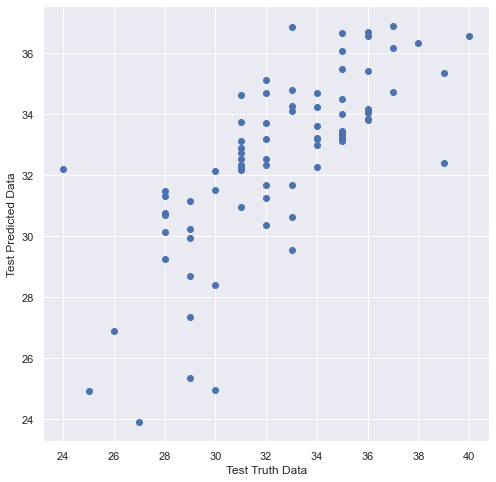

In [60]:
## Assumptions of linear Regression
plt.scatter(y_test,linear_reg_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

### Residuals should be normally distributed

In [61]:
## residuals
residuals_linear_reg = y_test-linear_reg_pred

In [62]:
residuals_linear_reg

,Temperature
24,-2.121133
6,-1.275992
153,-1.108123
211,1.544818
198,3.432570
...,...
180,0.385233
5,-1.316884
56,0.597095
125,-2.146190


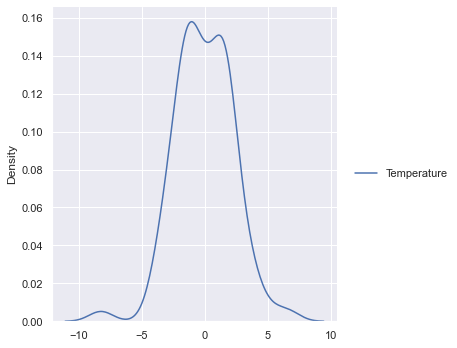

In [63]:
sns.displot(residuals_linear_reg,kind="kde")

### Residuals and predicted values should follow Uniform Distribution

Text(0, 0.5, 'Residuals')

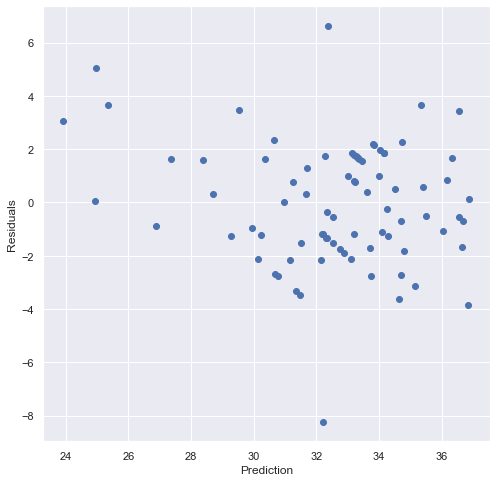

In [64]:
## Scatter plot with predictions and residual
plt.scatter(linear_reg_pred,residuals_linear_reg)
plt.xlabel("Prediction")
plt.ylabel("Residuals")

### Cost Function

In [65]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [66]:
print (f"MSE :{(mean_squared_error(y_test,linear_reg_pred))}")
print (f"MAE: {(mean_absolute_error(y_test,linear_reg_pred))}")
print (f"RMSE: {(np.sqrt(mean_squared_error(y_test,linear_reg_pred)))}")

MSE :5.1440340734239385
MAE: 1.816624554307503
RMSE: 2.2680463120103918


### Performance Metrics

In [67]:
from sklearn.metrics import r2_score

In [68]:
linear_score = r2_score(y_test,linear_reg_pred)
print(f"R-square Accuracy: {(linear_score*100)}%")
print (f"Adjusted R-square Accuracy: {(1 - (1-linear_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))*100}%")

R-square Accuracy: 52.10726897157023%
Adjusted R-square Accuracy: 46.03635940458618%


## Ridge Regression

In [69]:
from sklearn.linear_model import Ridge

In [70]:
ridge_reg=Ridge()

In [71]:
#passing training data X and y to the model
ridge_reg.fit(X_train,y_train)

Ridge()

In [72]:
## print the coefficients and the intercept 
print("Co-efficient of Independent feature is {}".format(ridge_reg.coef_))
print("Intercept of best fit hyper plane is {}".format(ridge_reg.intercept_))

Co-efficient of Independent feature is [[-1.128844   -0.46133629  0.08183743  1.6314207   0.53993679  0.44532083
   0.16303925 -0.55090562 -0.11702728]]
Intercept of best fit hyper plane is [31.98159509]


In [73]:
## Prediction  for the test data
ridge_reg_pred=ridge_reg.predict(X_test)
ridge_reg_pred

array([[33.12618992],
       [34.24674   ],
       [34.06922682],
       [33.42510732],
       [36.53814134],
       [32.42996174],
       [35.30762891],
       [27.4057252 ],
       [30.79261446],
       [29.54793777],
       [29.25913293],
       [33.24772941],
       [33.71838792],
       [33.21993484],
       [34.21546555],
       [32.23843379],
       [36.80045992],
       [25.41971491],
       [32.30821218],
       [33.6815395 ],
       [30.62048363],
       [28.39123683],
       [35.11991037],
       [28.71361891],
       [36.34377989],
       [26.9248708 ],
       [32.8908782 ],
       [33.38172768],
       [33.12033053],
       [34.62363441],
       [34.62800665],
       [31.51025782],
       [32.7258902 ],
       [33.39246733],
       [32.52281669],
       [33.20470157],
       [30.18157071],
       [34.51169763],
       [31.65133631],
       [23.9500916 ],
       [33.82657625],
       [33.98804714],
       [32.34987969],
       [25.03226483],
       [36.09250024],
       [32

Text(0, 0.5, 'Test Predicted Data')

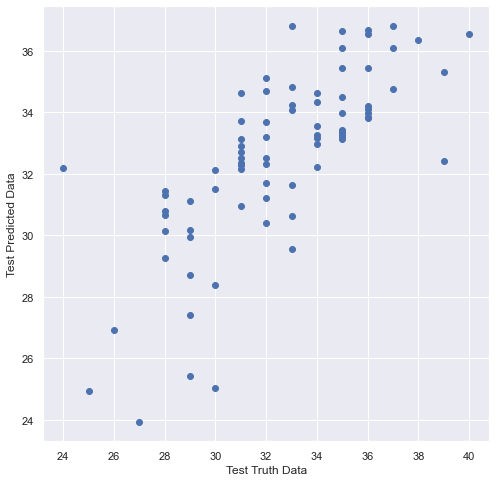

In [74]:
## Linear Relationship
plt.scatter(y_test,ridge_reg_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [75]:
## residuals
residuals_ridge_reg = y_test-ridge_reg_pred

In [76]:
residuals_ridge_reg

,Temperature
24,-2.126190
6,-1.246740
153,-1.069227
211,1.574893
198,3.461859
...,...
180,0.449240
5,-1.297258
56,0.569161
125,-2.125341


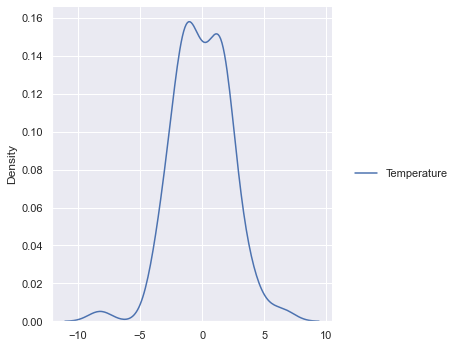

In [77]:
sns.displot(residuals_ridge_reg,kind="kde")

Text(0, 0.5, 'Residuals')

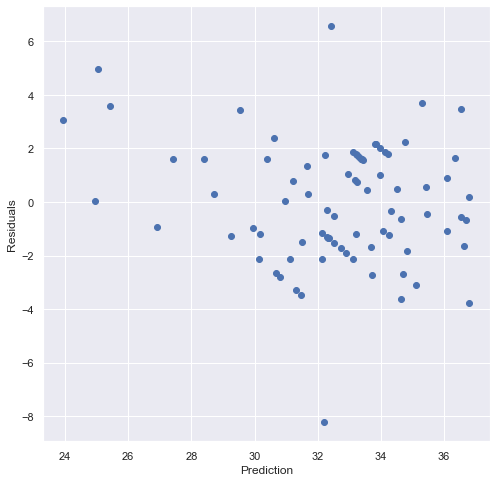

In [78]:
## Scatter plot with predictions and residual
plt.scatter(ridge_reg_pred,residuals_ridge_reg)
plt.xlabel("Prediction")
plt.ylabel("Residuals")

In [79]:
print (f"MSE :{(mean_squared_error(y_test,ridge_reg_pred))}")
print (f"MAE: {(mean_absolute_error(y_test,ridge_reg_pred))}")
print (f"RMSE: {(np.sqrt(mean_squared_error(y_test,ridge_reg_pred)))}")

MSE :5.10441260465425
MAE: 1.812177855113185
RMSE: 2.2592947139880293


In [80]:
ridge_score = r2_score(y_test,ridge_reg_pred)
print(f"R-square Accuracy: {(ridge_score*100)}%")
print (f"Adjusted R-square Accuracy: {(1 - (1-ridge_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))*100}%")

R-square Accuracy: 52.47615850839147%
Adjusted R-square Accuracy: 46.452009586919964%


## Lasso Regression

In [81]:
from sklearn.linear_model import Lasso

In [82]:
lasso_reg=Lasso()

In [83]:
#passing training data X and y to the model
lasso_reg.fit(X_train,y_train)

Lasso()

In [84]:
## print the coefficients and the intercept 
print("Co-efficient of Independent feature is {}".format(lasso_reg.coef_))
print("Intercept of best fit hyper plane is {}".format(lasso_reg.intercept_))

Co-efficient of Independent feature is [-0.62324302 -0.         -0.          1.25581509  0.          0.
  0.          0.          0.        ]
Intercept of best fit hyper plane is [31.98159509]


In [85]:
## Prediction  for the test data
lasso_reg_pred=lasso_reg.predict(X_test)
lasso_reg_pred

array([32.78381104, 33.3358205 , 33.53835729, 32.69192045, 34.21212444,
       31.67725854, 34.06518855, 28.84685412, 30.99078013, 30.10392027,
       31.06631475, 32.42020469, 32.80398907, 32.31726957, 33.37068778,
       32.46976122, 34.57875298, 27.38502889, 32.29240264, 33.12192792,
       31.62499111, 29.79900395, 33.65042591, 30.31559056, 34.62053146,
       28.73534108, 32.5527626 , 32.85187888, 32.99739235, 33.91411932,
       33.25917474, 31.27076256, 32.79238897, 32.82670067, 32.58151856,
       32.71432078, 31.4254765 , 33.30564213, 31.04995877, 28.31033379,
       32.79596672, 32.94981382, 32.61305239, 27.48796401, 34.24588058,
       32.5549849 , 31.88399562, 30.89031162, 34.19107957, 33.50571231,
       34.39861652, 31.81203876, 31.79074958, 32.97252542, 33.46393383,
       32.11393291, 34.88311373, 32.60669677, 31.06489233, 34.43070593,
       33.14932842, 31.16313854, 33.31119788, 32.23069043, 32.12966634,
       27.92377153, 33.05552681, 31.68837004, 34.34770454, 34.11

In [86]:
# reshaping data to avoid valueerror (Unable to coerce to Series)
lasso_reg_pred=lasso_reg_pred.reshape(81,1)

In [87]:
lasso_reg_pred

array([[32.78381104],
       [33.3358205 ],
       [33.53835729],
       [32.69192045],
       [34.21212444],
       [31.67725854],
       [34.06518855],
       [28.84685412],
       [30.99078013],
       [30.10392027],
       [31.06631475],
       [32.42020469],
       [32.80398907],
       [32.31726957],
       [33.37068778],
       [32.46976122],
       [34.57875298],
       [27.38502889],
       [32.29240264],
       [33.12192792],
       [31.62499111],
       [29.79900395],
       [33.65042591],
       [30.31559056],
       [34.62053146],
       [28.73534108],
       [32.5527626 ],
       [32.85187888],
       [32.99739235],
       [33.91411932],
       [33.25917474],
       [31.27076256],
       [32.79238897],
       [32.82670067],
       [32.58151856],
       [32.71432078],
       [31.4254765 ],
       [33.30564213],
       [31.04995877],
       [28.31033379],
       [32.79596672],
       [32.94981382],
       [32.61305239],
       [27.48796401],
       [34.24588058],
       [32

Text(0, 0.5, 'Test Predicted Data')

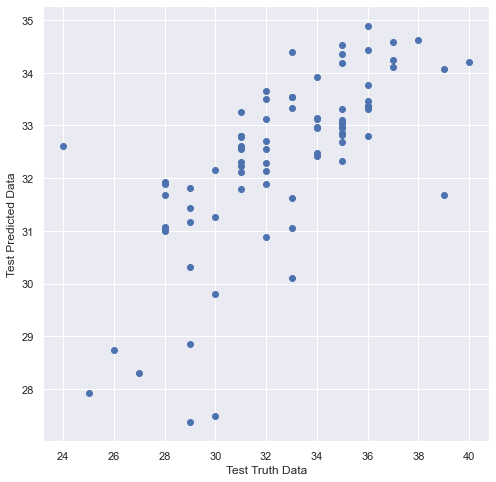

In [88]:
## Linear Relationship
plt.scatter(y_test,lasso_reg_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [89]:
## residuals
residuals_lasso_reg = y_test-lasso_reg_pred

In [90]:
residuals_lasso_reg

,Temperature
24,-1.783811
6,-0.335821
153,-0.538357
211,2.308080
198,5.787876
...,...
180,0.884428
5,-1.305114
56,2.230039
125,-2.157622


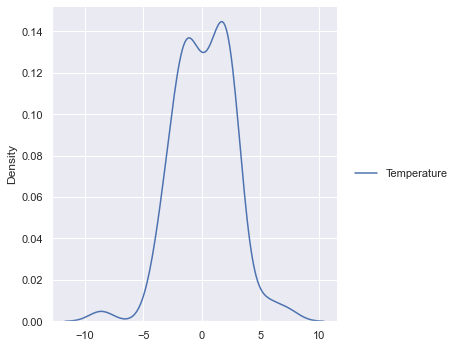

In [91]:
sns.displot(residuals_lasso_reg,kind="kde")

Text(0, 0.5, 'Residuals')

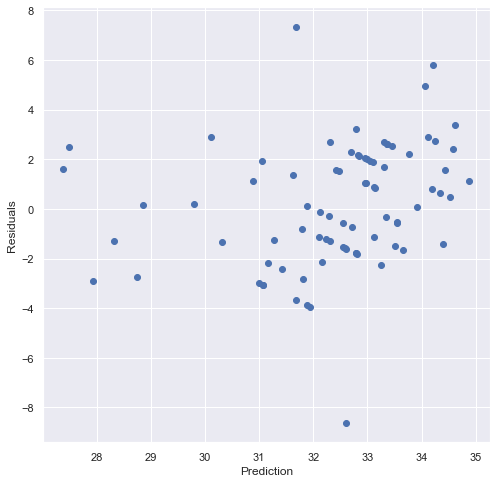

In [92]:
## Scatter plot with predictions and residual
plt.scatter(lasso_reg_pred,residuals_lasso_reg)
plt.xlabel("Prediction")
plt.ylabel("Residuals")

In [93]:
print (f"MSE :{(mean_squared_error(y_test,lasso_reg_pred))}")
print (f"MAE: {(mean_absolute_error(y_test,lasso_reg_pred))}")
print (f"RMSE: {(np.sqrt(mean_squared_error(y_test,lasso_reg_pred)))}")

MSE :6.085458745527471
MAE: 1.9978776414662658
RMSE: 2.4668722596696147


In [94]:
lasso_score = r2_score(y_test,lasso_reg_pred)
print(f"R-square Accuracy: {(lasso_score*100)}%")
print (f"Adjusted R-square Accuracy: {(1 - (1-lasso_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))*100}%")

R-square Accuracy: 43.34228064508907%
Adjusted R-square Accuracy: 36.16031621981867%


## Elastic Net

In [95]:
from sklearn.linear_model import ElasticNet

In [96]:
elastic_reg=ElasticNet()

In [97]:
#passing training data X and y to the model
elastic_reg.fit(X_train,y_train)

ElasticNet()

In [98]:
## print the coefficients and the intercept 
print("Co-efficient of Independent feature is {}".format(elastic_reg.coef_))
print("Intercept of best fit hyper plane is {}".format(elastic_reg.intercept_))

Co-efficient of Independent feature is [-0.68660819 -0.10729519 -0.01133909  0.87161383  0.10730334  0.
  0.24710703  0.03076538  0.16641415]
Intercept of best fit hyper plane is [31.98159509]


In [99]:
## Prediction  for the test data
elastic_reg_pred=elastic_reg.predict(X_test)
elastic_reg_pred

array([32.65256996, 33.25056558, 33.35664726, 32.54205018, 34.69525792,
       31.63470292, 34.18134196, 29.02965354, 30.78570894, 30.13252743,
       30.45231109, 32.31544376, 32.56189723, 32.17489562, 33.83320104,
       32.21088442, 35.64395188, 27.8812157 , 32.07683621, 32.8901327 ,
       31.08820729, 29.67645915, 33.67039069, 30.11852367, 35.39011198,
       28.87997656, 32.33069454, 32.82341449, 32.61035675, 34.16641541,
       33.29924587, 31.22742866, 32.68528639, 33.03186089, 32.16811667,
       32.44762109, 30.87567129, 33.23168415, 31.06207802, 27.9644791 ,
       32.74801743, 32.75694081, 32.24725645, 27.82670749, 34.70745611,
       32.35515881, 31.6432799 , 30.77367885, 34.28175003, 33.57529939,
       35.63209843, 31.30433666, 31.51696316, 33.59539218, 33.60290528,
       32.23503043, 36.10463476, 32.05723319, 30.86007637, 34.88440778,
       33.04643393, 30.82269541, 33.46716217, 31.88611065, 31.77279988,
       27.9685264 , 32.95696894, 31.29725359, 35.38485687, 34.13

In [100]:
# reshaping data to avoid valueerror (Unable to coerce to Series)
elastic_reg_pred=elastic_reg_pred.reshape(81,1)

In [101]:
elastic_reg_pred

array([[32.65256996],
       [33.25056558],
       [33.35664726],
       [32.54205018],
       [34.69525792],
       [31.63470292],
       [34.18134196],
       [29.02965354],
       [30.78570894],
       [30.13252743],
       [30.45231109],
       [32.31544376],
       [32.56189723],
       [32.17489562],
       [33.83320104],
       [32.21088442],
       [35.64395188],
       [27.8812157 ],
       [32.07683621],
       [32.8901327 ],
       [31.08820729],
       [29.67645915],
       [33.67039069],
       [30.11852367],
       [35.39011198],
       [28.87997656],
       [32.33069454],
       [32.82341449],
       [32.61035675],
       [34.16641541],
       [33.29924587],
       [31.22742866],
       [32.68528639],
       [33.03186089],
       [32.16811667],
       [32.44762109],
       [30.87567129],
       [33.23168415],
       [31.06207802],
       [27.9644791 ],
       [32.74801743],
       [32.75694081],
       [32.24725645],
       [27.82670749],
       [34.70745611],
       [32

Text(0, 0.5, 'Test Predicted Data')

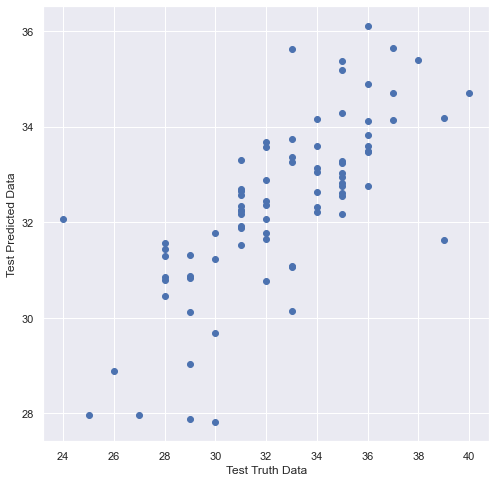

In [102]:
## Linear Relationship
plt.scatter(y_test,elastic_reg_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

In [103]:
## residuals
residuals_elastic_reg = y_test-elastic_reg_pred

In [104]:
residuals_elastic_reg

,Temperature
24,-1.652570
6,-0.250566
153,-0.356647
211,2.457950
198,5.304742
...,...
180,0.865689
5,-0.925029
56,1.880581
125,-1.778840


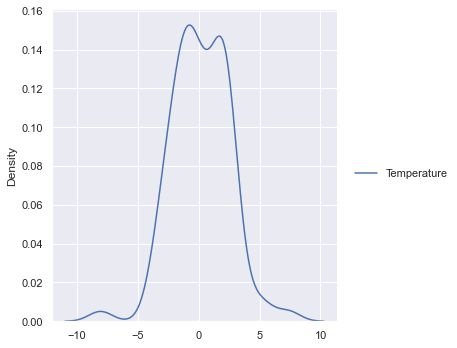

In [105]:
sns.displot(residuals_elastic_reg,kind="kde")

Text(0, 0.5, 'Residuals')

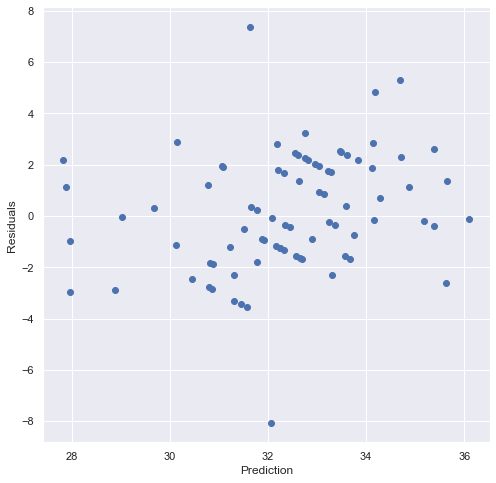

In [106]:
## Scatter plot with predictions and residual
plt.scatter(elastic_reg_pred,residuals_elastic_reg)
plt.xlabel("Prediction")
plt.ylabel("Residuals")

In [107]:
print (f"MSE :{(mean_squared_error(y_test,elastic_reg_pred))}")
print (f"MAE: {(mean_absolute_error(y_test,elastic_reg_pred))}")
print (f"RMSE: {(np.sqrt(mean_squared_error(y_test,elastic_reg_pred)))}")

MSE :5.402378245642594
MAE: 1.8487698991824761
RMSE: 2.3243016683818376


In [108]:
elastic_score = r2_score(y_test,elastic_reg_pred)
print(f"R-square Accuracy: {(elastic_score*100)}%")
print (f"Adjusted R-square Accuracy: {(1 - (1-elastic_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))*100}%")

R-square Accuracy: 49.70199564401724%
Adjusted R-square Accuracy: 43.326192274948994%


## Comparison of all Models

**Models:**

1. Linear Regression
2. Ridge Regression
3. Lasso Regression
4. Elastic Net Regression

### Cost Function Values

In [109]:
print("-------------------------------------------------------")
print(f"MSE:\n1. Linear Regression : {round(mean_squared_error(y_test,linear_reg_pred),3)}\n2. Ridge Regression : {round(mean_squared_error(y_test,ridge_reg_pred),3)}\n3. Lasso Regression : {round(mean_squared_error(y_test,lasso_reg_pred),3)}\n4. Elastic Net Regression : {round(mean_squared_error(y_test,elastic_reg_pred),3)}")
print("-------------------------------------------------------")
print(f"MAE:\n1. Linear Regression : {round(mean_absolute_error(y_test,linear_reg_pred),3)}\n2. Ridge Regression : {round(mean_absolute_error(y_test,ridge_reg_pred),3)}\n3. Lasso Regression : {round(mean_absolute_error(y_test,lasso_reg_pred),3)}\n4. Elastic Net Regression : {round(mean_absolute_error(y_test,elastic_reg_pred),3)}")
print("-------------------------------------------------------")
print(f"RMSE:\n1. Linear Regression : {round(np.sqrt(mean_squared_error(y_test,linear_reg_pred)),3)}\n2. Ridge Regression : {round(np.sqrt(mean_squared_error(y_test,ridge_reg_pred)),3)}\n3. Lasso Regression : {round(np.sqrt(mean_squared_error(y_test,lasso_reg_pred)),3)}\n4. Elastic Net Regression : {round(np.sqrt(mean_squared_error(y_test,elastic_reg_pred)),3)}")
print("-------------------------------------------------------")


-------------------------------------------------------
MSE:
1. Linear Regression : 5.144
2. Ridge Regression : 5.104
3. Lasso Regression : 6.085
4. Elastic Net Regression : 5.402
-------------------------------------------------------
MAE:
1. Linear Regression : 1.817
2. Ridge Regression : 1.812
3. Lasso Regression : 1.998
4. Elastic Net Regression : 1.849
-------------------------------------------------------
RMSE:
1. Linear Regression : 2.268
2. Ridge Regression : 2.259
3. Lasso Regression : 2.467
4. Elastic Net Regression : 2.324
-------------------------------------------------------


### Performance Metrics

In [110]:
print("-------------------------------------------------------")
print("R-Square Accuracy:")
print("-------------------------------------------------------")
print(f"1. Linear Regression : {round(linear_score*100,3)}%\n2. Ridge Regression : {round(ridge_score*100,3)}%\n3. Lasso Regression : {round(lasso_score*100,3)}%\n4. ElasticNet Regression : {round(elastic_score*100,3)}%")
print("-------------------------------------------------------")
print("Adjusted R-Square Accuracy:")
print("-------------------------------------------------------")
print(f"Linear Regression : {round((1 - (1-linear_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))*100,3)}%")
print(f"Ridge Regression : {round((1 - (1-ridge_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))*100,3)}%")
print(f"Lasso Regression : {round((1 - (1-lasso_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))*100,3)}%")
print(f"Elastic Net Regression : {round((1 - (1-elastic_score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))*100,3)}%")
print("-------------------------------------------------------")

-------------------------------------------------------
R-Square Accuracy:
-------------------------------------------------------
1. Linear Regression : 52.107%
2. Ridge Regression : 52.476%
3. Lasso Regression : 43.342%
4. ElasticNet Regression : 49.702%
-------------------------------------------------------
Adjusted R-Square Accuracy:
-------------------------------------------------------
Linear Regression : 46.036%
Ridge Regression : 46.452%
Lasso Regression : 36.16%
Elastic Net Regression : 43.326%
-------------------------------------------------------
